In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# filenames = ['node1_Bandwidth.txt', 'node2_Bandwidth.txt','node3_Bandwidth.txt']

# with open('BW.txt', 'w') as outfile:
#     for fname in filenames:
#         with open(fname) as infile:
#             outfile.write(infile.read())
            
filenames = ['node1_Processing.txt', 'node2_Processing.txt','node3_Processing.txt']

with open('PT.txt', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            outfile.write(infile.read())

No handles with labels found to put in legend.


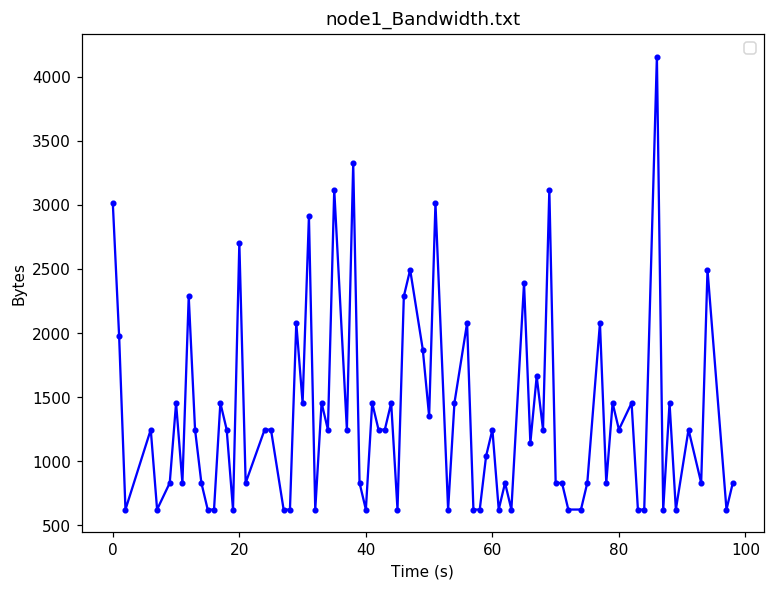

No handles with labels found to put in legend.


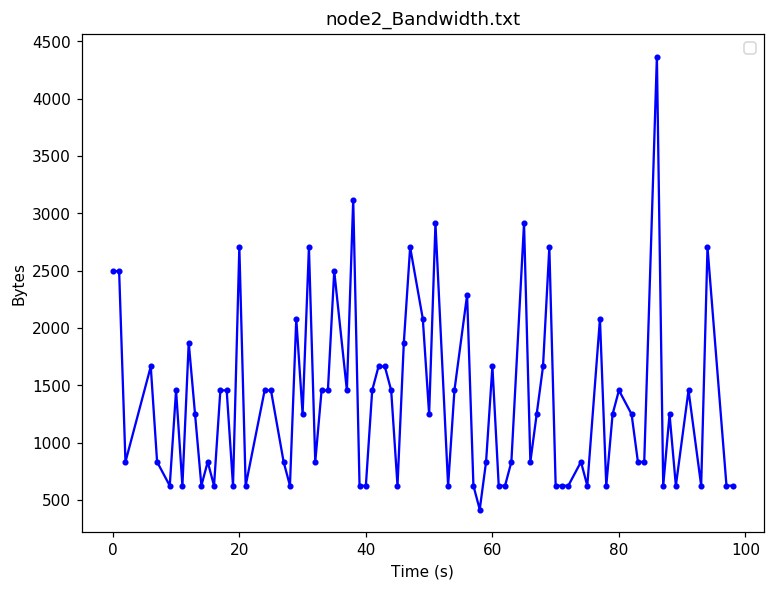

No handles with labels found to put in legend.


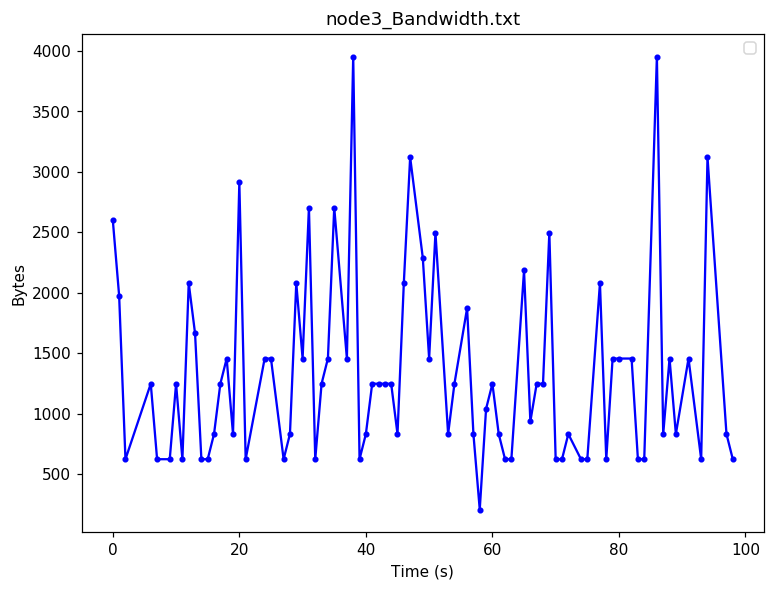

In [48]:
X = np.array([])
for file in ['node1_Bandwidth.txt', 'node2_Bandwidth.txt','node3_Bandwidth.txt']:
    table = (pd.read_table(file, sep=' ', header=None, names=['bandWidth', 'Time'])).astype(float)
    table['Time']  = (table['Time']).apply(np.floor)
    table['Time']  = table['Time'] - table['Time'][0]

#     print(table)

    tableSum = table.groupby('Time').sum().reset_index()

    xAxis = tableSum['Time'].to_numpy()

    yAxis = tableSum['bandWidth'].to_numpy()
    plt.figure(figsize=(8, 6),dpi=110)
    plt.plot(xAxis, yAxis, '-b.')
    plt.title(file)
    plt.xlabel('Time (s)')
    plt.ylabel('Bytes')
    plt.legend()
    plt.savefig(file+".png")
    plt.show()
    


No handles with labels found to put in legend.


160
160


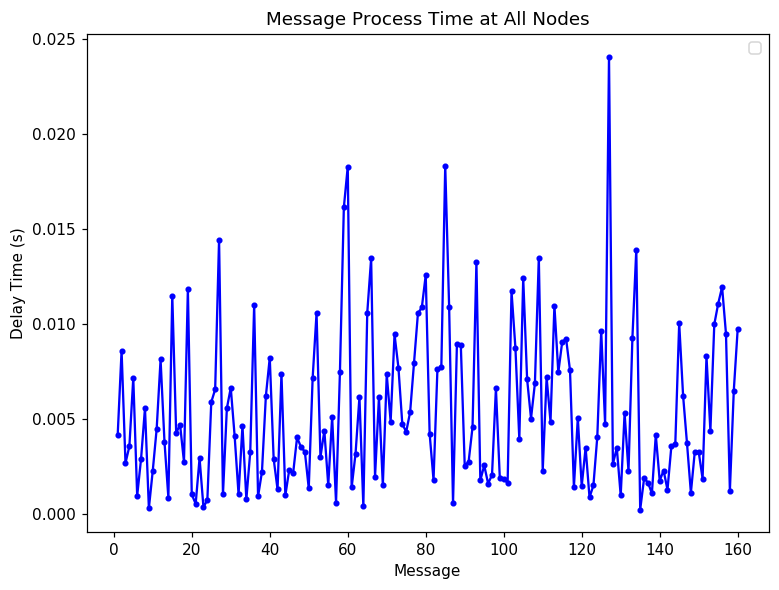

In [46]:
X = np.array([])

table = (pd.read_table("PT.txt", sep=' ', header=None, names=['msgID', 'Time'])).astype(float)
# table['Time']  = (table['Time']).apply(np.floor)
# table['Time']  = table['Time'] - table['Time'][0]


# print(table)

tableMin = table.groupby('msgID').min()
tableMax = table.groupby('msgID').max()
print(len(tableMax))
tableMax['msgIndex'] = range(1, len(tableMax) + 1)
xAxis = tableMax['msgIndex'].to_numpy()
print(len(xAxis))
yAxis = (tableMax['Time'] - tableMin['Time']).to_numpy()

# print(yAxis)

plt.figure(figsize=(8, 6),dpi=110)
plt.plot(xAxis, yAxis, '.b-')
plt.title("Message Process Time at All Nodes")
plt.xlabel('Message')
plt.ylabel('Delay Time (s)')
plt.legend()
plt.savefig("allNodeBandWidth.png")
plt.show()
